In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from importlib import reload
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input

import os
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import numpy as np

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [4]:
num_classes = 2
image_size = 224
batch_size_training = 32
batch_size_validation = 32

In [5]:
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [6]:
train_generator = data_generator.flow_from_directory(
    '/content/gdrive/MyDrive/MP/dataset/train',
    target_size = (image_size , image_size),
    batch_size = batch_size_training,
    class_mode = 'categorical'
    )

valid_generator = data_generator.flow_from_directory(
    '/content/gdrive/MyDrive/MP/dataset/valid',
    target_size = (image_size , image_size),
    batch_size = batch_size_validation,
    class_mode = 'categorical'
    )

Found 12618 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [7]:
model_new = Sequential()

In [8]:
model_new.add(vgg16.VGG16(include_top = False,pooling='avg',weights='imagenet',))

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
model_new.add(Dense(num_classes,activation='softmax'))

In [10]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 14,715,714
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_new.layers[0].trainable = False
model_new.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
steps_per_epoch_train = len(train_generator)
steps_per_epoch_valid = len(valid_generator)
number_epochs = 3

In [12]:
fit_history = model_new.fit_generator(train_generator , steps_per_epoch=steps_per_epoch_train,
                                  epochs=number_epochs , verbose=1 , validation_data=valid_generator,
                                  validation_steps=steps_per_epoch_valid)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
143/395 [=========>....................] - ETA: 1:07:21 - loss: 2.3933 - accuracy: 0.5414

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


395/395 [==============================] - 6429s 16s/step - loss: 1.8859 - accuracy: 0.5703 - val_loss: 0.8046 - val_accuracy: 0.6923
Epoch 2/3
395/395 [==============================] - 6409s 16s/step - loss: 0.8544 - accuracy: 0.6341 - val_loss: 0.5577 - val_accuracy: 0.7372
Epoch 3/3
395/395 [==============================] - 6489s 16s/step - loss: 0.6791 - accuracy: 0.6708 - val_loss: 0.5270 - val_accuracy: 0.7372


In [13]:
model_new.save('/content/gdrive/MyDrive/MP/vgg16_model_new1.h5')

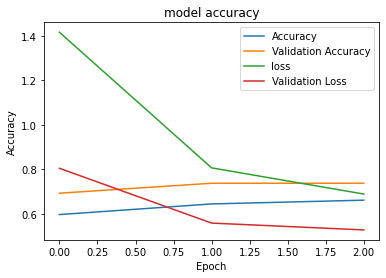

In [15]:
import matplotlib.pyplot as plt
plt.plot(fit_history.history["accuracy"])
plt.plot(fit_history.history['val_accuracy'])
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [16]:
test_generator = data_generator.flow_from_directory('/content/gdrive/MyDrive/MP/dataset/test',target_size = (image_size , image_size),shuffle = False)
steps_per_epoch_test = len(test_generator)

Found 85 images belonging to 2 classes.


In [17]:
from keras.models import load_model
vgg16_saved = load_model("/content/gdrive/MyDrive/MP/vgg16_model_new1.h5")

In [18]:
test_history = vgg16_saved.evaluate(test_generator, steps=steps_per_epoch_test, verbose=1)
print("Accuracy: ",test_history[1])

3/3 [==============================] - 44s 13s/step - loss: 0.8468 - accuracy: 0.5176
Accuracy:  0.5176470875740051


In [19]:
predict_vgg16=vgg16_saved.predict_generator(test_generator,steps=steps_per_epoch_test,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3/3 [==============================] - 43s 13s/step


In [20]:
len(predict_vgg16)

85

In [21]:
for i in range(0,len(predict_vgg16)):
   Authentic = predict_vgg16[i][0]
   Doctored = predict_vgg16[i][1]
   if(Authentic > Doctored):
     print("Authentic")
   else:
     print("Doctored")  

Doctored
Authentic
Authentic
Authentic
Doctored
Authentic
Doctored
Doctored
Authentic
Authentic
Authentic
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Authentic
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Authentic
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored


0.09974109 0.9002589
Doctored


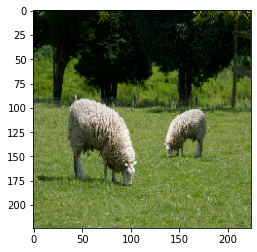

In [22]:
from keras.preprocessing import image
img = image.load_img("/content/gdrive/MyDrive/MP/samples/12.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/gdrive/MyDrive/MP/vgg16_model_new1.h5")
output = saved_model.predict(img)
print(output[0][0], output[0][1])
if output[0][0] > output[0][1]:
    print("Authentic")
else:
    print('Doctored')

In [23]:
import tensorflow as tf

mymodel = "vgg16_model_new1.h5"
converter = tf.lite.TFLiteConverter.from_keras_model_file(mymodel) 
tfmodel = converter.convert() 
open ("vgg16model.tflite" , "wb") .write(tfmodel)

AttributeError: ignored